In [28]:
import numpy as np

In [29]:
# Sample 1
x1 = np.array([3, 100, 4])
y1 = np.array([21])

# What is the idea of prediction? What is machine learning?
# -> Find the weight that can bring you from x1 to y1

# 3 * w1 + 100 * w2 + 4 * w3 = 21

# Machine learning is trying to find 'best' weights
# These best weights across all samples



In [30]:
X = np.array([[3, 100, 4] , [4,500, 7]])
X.shape #(2,3) means 2 samples = m, 3 features = n

(2, 3)

In [31]:
# weights = theta = params
theta = np.array([7,1,-25])
theta.shape # Weights must be the sample shape as X.shape[1]

(3,)

In [32]:
# X @ theta (X.dot theta )
# Dot product- same number in close pair
#(4,6,1) @ (1, 2 ) = (4,6,1,2)

X @ theta

array([ 21, 353])

In [33]:
#Definition of terms and notations

#2 samples
#3 features - egg price, gold price, oil price
    #features are the variables used for predicting the label
    #factors, independent variables, predictors, X

#egg price - x_1 --> always a vector,  e.g., [3, 4]
#gold price - x_2 --> always a vector, e.g., [100, 500]
#oil price - x_3 --> always a vector, e.g., [4, 7]
#we call egg price + gold price + oil price - whole `feature matrix` --> \mathbf{X}
    
#1 label - gdp
    #label is the variable that we want to predict....
    #target, outcome, y
    #y_1 = y = a vector of labels, e.g., [21, 43]
    
#Tips: small and big

Math notations:

- normal a -> scalar (one number)
- bold  $\mathbf{a}$  --> vector (a 1D numpy array)
- bold  $\mathbf{A}$  --> matrix (a 2D numpy array....)

- $\mathbf{x}_1^2$  --> feature 1, second sample


### How to find the best weight?

- There are many ways, e.g., closed form, gradient descent, expectation
- gradient descent / backpropagation
  - You adjust the weight slightly, based on the errors....
  - How to adjust based on the errors

0. You first use any randomized weight
   
   [1, 2, 3]

1. We need to find out how to measure errors

$\sum_0^m (\hat{y}_i - y_i)^2 $

2. We need to know how much to adjust the weight?  HOW?

- Just try all numbers in the world..... ---> NO

- Find the derivative first!

3. We need to change the weight accordingly

- Weight = weight - $\alpha$ * derivative

- $\alpha$ = 0.1, 0.01, 0.001,...

4. Run predict again....

5. We stop when our errors are decreased no more....or reach some max iterations...



Text(0, 0.5, 'error/cost')

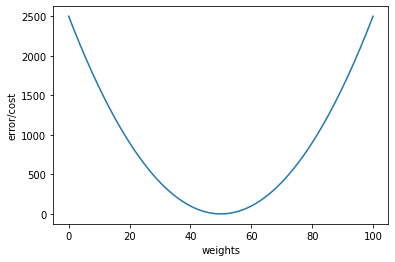

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(0, 100, 1000)
y = (x - 50) ** 2

plt.plot(x, y)
plt.xlabel("weights")
plt.ylabel("error/cost")


### Step 1 : Load some data

In [35]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

#print the shape of X and y
X.shape, y.shape

assert X.ndim == 2
assert y.ndim == 1

#print one row of X, and maybe try to see what it is...
#X[0]
#y[0]
print(diabetes.feature_names)

# Label is blood glucouse level

#print one row of y, and maybe try to see what it is....

#please help me set m and 
m = X.shape[0] # Number of samples
n = X.shape[1] # Number of features
m,n

#write an assert function to check that X and y has same amount of samples...
assert m == y.shape[0]


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Step 2 : Train-test split

In [36]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

# Assert X_train and y_train has same ammount of samples
assert X_train.shape[0] == y_train.shape[0]

# Assert X_test and y_test has same ammount of samples
assert X_test.shape[0] == y_test.shape[0]


### Step 3 : Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Satndadize the trainning set
X_train = sc.fit_transform(X_train)

# Standardize the test set
X_test = sc.transform(X_test)

### Step 4 : Add intercept to your X

In [38]:
# Example: if your X is        [  [3, 2, 4],    [2, 6, 8]  ]
# I want you to make it into   [  [1, 3, 2, 4], [1, 2, 6, 8]  ]
# Why 1?  because imagine you have another weight, which let's call w0
# this w0 is actually the intercept; so multiply with 1, will do nothing
# so we can still use X @ theta....

intercept = np.ones((X_train.shape[0], 1))
intercept.shape

#hint: use np.concatenate with X_train on axis=1, to add these ones to X_train
X_train = np.concatenate((intercept, X_train), axis = 1)

In [39]:
X_train.shape

(309, 11)

In [40]:
intercept = np.ones((X_test.shape[0], 1))
intercept.shape

X_test = np.concatenate((intercept, X_test), axis = 1)

In [41]:
X_test.shape

(133, 11)

### Step 5: Fitting!!! Gradient Descent

In [42]:
#put everything fit()

#1. randomize our theta
#please help me create a random theta of size (X_train.shape[1], )
theta = np.ones(X_train.shape[1])
#why X_train.shape[1]

#5. repeat 2, 3, 4
#please put a for loop for 2, 3, 4, for 1000 times
#set 1000 call it max_iter
#for _ in range(max_iter):
max_iter = 1000
alpha = 0.0001

def predict(X, theta):
    return X @ theta

def mean_squared_error(ytrue, ypred):
    return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]

def _grad(X, error):
    return X.T @ error

def fit(X_train, y_train, theta, max_iter, alpha):
    
    for i in range(max_iter):
        #2. predict
        yhat = predict(X_train, theta)  #put this into a function called predict(X_train, theta)

        #2.1 can you guys compute the squared error
        # squared_error = ((yhat - y_train) ** 2).sum()
        #print the mean squared error, we can see whether MSE goes down eventually...
        mse =  mean_squared_error(y_train, yhat)
        if(i % 50 == 0):
            print(f"MSE: {mse}")  

        #3. get derivatives
        deriv = _grad(X_train, yhat - y_train)

        #4. update weight
        theta = theta - alpha * deriv
        
    return theta



In [43]:
theta = fit(X_train, y_train, theta, max_iter, alpha)
theta

MSE: 30046.31881174594
MSE: 4206.414663753659
MSE: 3146.4187524734234
MSE: 3096.56099093493
MSE: 3092.4423530589784
MSE: 3090.7457848318663
MSE: 3089.3093029548677
MSE: 3087.9775768316204
MSE: 3086.723718999417
MSE: 3085.535594108654
MSE: 3084.404775758596
MSE: 3083.324675874108
MSE: 3082.289978994901
MSE: 3081.2963455330882
MSE: 3080.3402039692637
MSE: 3079.4185916127904
MSE: 3078.5290297915208
MSE: 3077.66942549067
MSE: 3076.83799371986
MSE: 3076.033196201499


array([156.98058252,   2.27084632, -12.19482609,  22.63910378,
        14.49359804, -12.49568854,   6.18459067,  -6.29424872,
         4.50181477,  28.04584342,   3.53515318])

### Step 6 : Testing

In [44]:
yhat = predict(X_test, theta)

mean_squared_error(y_test, yhat)


2487.362361336741

In [75]:
import numpy as np


In [83]:
from sklearn.model_selection import KFold
class LinearRegression(object):

    kfold = KFold(n_splits=5)
        
    def __init__(self, alpha=0.001, num_epochs=5, batch_size=50, method='batch', cv=kfold):
        self.max_iter   = max_iter
        self.alpha      = alpha
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = cv
    
    def fit(self, X_train, y_train):

        #Using training

        #Please change it to cross-validation

        # List of kfold scores
        self.kfold = list()

        #K-fold.split in sklearn
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):

            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]
            
            #create self.theta here
            self.theta = np.zeros(X_train.shape[1])            
            
            #define X_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            for epoch in range(self.num_epochs):
            
                #with replacement or no replacement
                #with replacement means just randomize
                #with no replacement means 0:50, 51:100, 101:150, ......300:323
                #shuffle your index
                #===> please shuffle your index
                perm = np.random.permutation(X_train.shape[0])
                        
                X_train = X_train[perm]
                y_train = y_train[perm]

                if self.method == 'sto':
                    for batch_idx in range(X_train.shape[0]):
                        X_method_train = X_train[batch_idx].reshape(1,-1) #(11,0) ==> (11,1)
                        y_method_train = y_train[batch_idx]
                        self._train(X_method_train, y_method_train)
                elif self.method == 'mini':
                    for batch_idx in range(0, X_train.shape[0], self.batch_size):                
                        X_method_train = X_train[batch_idx:batch_idx+self.batch_size, :]
                        y_method_train = y_train[batch_idx:batch_idx+self.batch_size]
                        self._train(X_method_train, y_method_train)
                else:
                    X_method_train = X_train
                    y_method_train = y_train
                    self._train(X_method_train, y_method_train)
            
            #print the validation mse  
            yhat_val = self.predict(X_cross_val)  
            self.kfold.append(mean_squared_error(y_cross_val, yhat_val))
            print(f"Fold: {fold}: {mean_squared_error(y_cross_val, yhat_val)}")

    
    def _train(self, X, y):
        yhat = self.predict(X)
        grad = X.T @ (yhat - y)
        self.theta = self.theta - self.alpha * grad
    
    def predict(self, X):
        return X @ self.theta
    
    def _coef(self):
        return self.theta[1:]
        
    def _bias(self):
        return self.theta[0]        

    

In [84]:
lr = LinearRegression(method='sto')

In [85]:
lr.fit(X_train, y_train)

Fold: 0: 4576.551952445295
Fold: 1: 4339.441603603833
Fold: 2: 4112.492671865431
Fold: 3: 3756.0612448296615
Fold: 4: 5194.321828548474


In [86]:
yhat = lr.predict(X_test)

In [87]:
mean_squared_error(y_test, yhat)

3191.746150030711

In [88]:
lr._coef()  #the weight associated with the ten features

array([ 3.09815574, -7.88661367, 20.11238264, 12.70520493,  0.43979203,
       -2.4781156 , -8.8214922 ,  7.23143671, 18.33841116,  7.26479454])

In [89]:
lr._bias() #the bias or the intercept 

123.67057047016428